In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import time
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Caricamento del dataset
df = pd.read_csv("EDA_Student_Depression_Dataset.csv")

In [6]:
# Preprocessing: rimuovo righe con valori nulli e colonne non numeriche
df = df.dropna()
df = df.select_dtypes(include=['int64', 'float64'])

# Target: 'Depression' (1 = depressed, 0 = not depressed)
# Feature-target split
X = df.drop("Depression", axis=1)
y = df["Depression"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Inizio del cronometro
start_time = time.time()

# Addestramento Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fine del cronometro
end_time = time.time()

In [8]:
training_time = end_time - start_time
print(f"Tempo di addestramento: {training_time:.4f} secondi")

Tempo di addestramento: 1.7987 secondi


In [9]:
# Valutazione
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2321
           1       0.86      0.87      0.87      3229

    accuracy                           0.84      5550
   macro avg       0.84      0.84      0.84      5550
weighted avg       0.84      0.84      0.84      5550



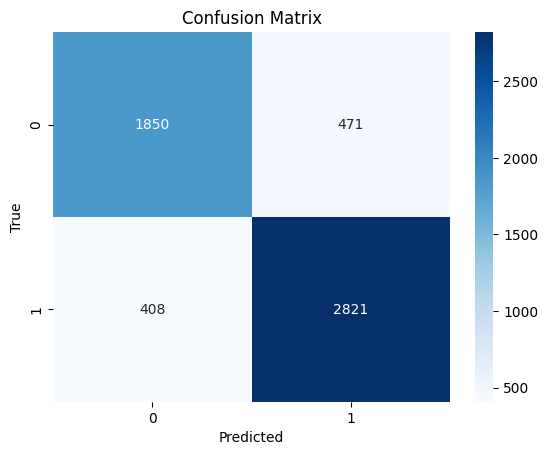

In [10]:
# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()